## 1. Import Library

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import numpy as np
import tensorflow as tf
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
# setting hyperparameter
batch_size = 32
epochs = 1000
lr = 0.01
train_ratio = 0.9

## 2. 匯入MINIST手寫辨識數據集以及資料前處理
使用sklearn 8x8 的手寫數字數據集

In [3]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train=X_train.reshape(len(X_train),-1)/255
X_test=X_test.reshape(len(X_test),-1)/255
# one hot encoding
y_train_one_hot = np.eye(10)[y_train]
y_test_one_hot = np.eye(10)[y_test]

print('Training data shape:',X_train.shape)
print('Testing data shape:',X_test.shape)

Training data shape: (60000, 784)
Testing data shape: (10000, 784)


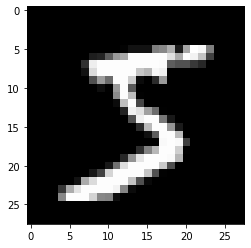

5


In [4]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.show()
print(y_train[0])

## 3. 建立網路模型

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

print(tf.__version__)

1.14.0


In [6]:
# 此範例使用 Tensorflow2.0 Sequential API 搭建神經網路。
def build_model():
    model = Sequential()
    model.add(Dense(25, Activation('relu'), input_dim=X_train.shape[-1]))
    model.add(Dense(10, Activation('softmax')))
    return model

In [7]:
model = build_model()
model.summary()   # Weights = (64+1)*25+(25+1)*10

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 25)                19625     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                260       
Total params: 19,885
Trainable params: 19,885
Non-trainable params: 0
_________________________________________________________________


## 4. 編譯&訓練模型

In [8]:
# 編譯模型
optim = Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=optim,
              metrics=['acc'])

batch_size=64
epochs = 25

# 訓練模型
history = model.fit(X_train, y_train_one_hot,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    shuffle=True,
                    validation_split=0.1)


Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 1s 16us/sample - loss: 0.4635 - acc: 0.8719 - val_loss: 0.2309 - val_acc: 0.9382
Epoch 2/25
54000/54000 [==============================] - 1s 14us/sample - loss: 0.2581 - acc: 0.9269 - val_loss: 0.1902 - val_acc: 0.9495
Epoch 3/25
54000/54000 [==============================] - 1s 14us/sample - loss: 0.2133 - acc: 0.9395 - val_loss: 0.1651 - val_acc: 0.9543
Epoch 4/25
54000/54000 [==============================] - 1s 14us/sample - loss: 0.1852 - acc: 0.9469 - val_loss: 0.1470 - val_acc: 0.9598
Epoch 5/25
54000/54000 [==============================] - 1s 14us/sample - loss: 0.1650 - acc: 0.9524 - val_loss: 0.1414 - val_acc: 0.9605
Epoch 6/25
54000/54000 [==============================] - 1s 14us/sample - loss: 0.1493 - acc: 0.9560 - val_loss: 0.1440 - val_acc: 0.9578
Epoch 7/25
54000/54000 [==============================] - 1s 15us/sample - loss: 0.1371 - acc: 0.9595 - val_loss: 0.1

## 5) 觀察訓練結果

In [9]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

In [10]:
import matplotlib.pyplot as plt

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs_ = range(1,len(acc)+1)

### 訓練集和測試集 loss

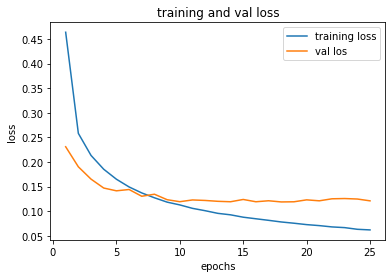

In [11]:
plt.plot(epochs_ , loss , label = 'training loss')
plt.plot(epochs_ , val_loss , label = 'val los')
plt.title('training and val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

### 訓練集和測試集 accuracy

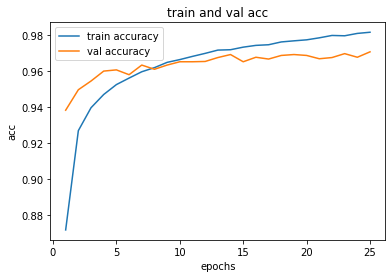

In [12]:
plt.clf()
plt.plot(epochs_ , acc , label='train accuracy')
plt.plot(epochs_ , val_acc , label = 'val accuracy')
plt.title('train and val acc')
plt.xlabel('epochs')
plt.ylabel('acc')
plt.legend()
plt.show()

## 測試集預測

In [13]:
from sklearn.metrics import accuracy_score

pred =  np.argmax(model.predict(X_test), axis=1)
accuracy_score(y_test, pred)

0.9646

## 儲存模型

In [19]:
import tensorflowjs as tfjs
# tfjs.converters.save_keras_model(model, 'models')

ModuleNotFoundError: No module named 'tensorflow.compat'